`March 23, 2022`

## **Logistic Regression Exercise**

**Please use 'titanic' dataset from seaborn.**

    - Target = survived
    - Features = pclass, sex, age, fare, embark_town, alone

<br>

**`DO THE FOLLOWING:`**
- Explore and preprocess the data.
- Impute missing value with an appropriate value, if any.
- Check multicollinearity.
- Interpret the model summary (OR of each feature).

**Use sklearn:**
- Split data into train & test set with a ratio of 80:20.
- Check and interpret the model accuracy of the test set.


**Dataset Information**

[Titanic](https://www.kaggle.com/c/titanic/data)

#### **Import Libraries**

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor # To calculate VIF score

from sklearn.model_selection import train_test_split # To split data randomly
from sklearn.metrics import accuracy_score # To calculate accuracy score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore') # To hide warnings

pd.set_option('display.max_rows', 200)

#### **Load Dataset**

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# Selected features
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embark_town', 'alone']]
df.head()

,survived,pclass,sex,age,fare,embark_town,alone
0,0,3,male,22.0,7.2500,Southampton,False
1,1,1,female,38.0,71.2833,Cherbourg,False
2,1,3,female,26.0,7.9250,Southampton,True
3,1,1,female,35.0,53.1000,Southampton,False
4,0,3,male,35.0,8.0500,Southampton,True


In [6]:
df[df.duplicated()]

,survived,pclass,sex,age,fare,embark_town,alone
47,1,3,female,NaN,7.7500,Queenstown,True
76,0,3,male,NaN,7.8958,Southampton,True
77,0,3,male,NaN,8.0500,Southampton,True
87,0,3,male,NaN,8.0500,Southampton,True
95,0,3,male,NaN,8.0500,Southampton,True
101,0,3,male,NaN,7.8958,Southampton,True
121,0,3,male,NaN,8.0500,Southampton,True
133,1,2,female,29.00,26.0000,Southampton,False
173,0,3,male,21.00,7.9250,Southampton,True
196,0,3,male,NaN,7.7500,Queenstown,True


#### **Imputing missing values**

In [4]:
# Check missing values
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
fare             0
embark_town      2
alone            0
dtype: int64

In [5]:
# Show data with missing value.
df[df.isna().any(axis=1)]

,survived,pclass,sex,age,fare,embark_town,alone
5,0,3,male,NaN,8.4583,Queenstown,True
17,1,2,male,NaN,13.0000,Southampton,True
19,1,3,female,NaN,7.2250,Cherbourg,True
26,0,3,male,NaN,7.2250,Cherbourg,True
28,1,3,female,NaN,7.8792,Queenstown,True
...,...,...,...,...,...,...,...
859,0,3,male,NaN,7.2292,Cherbourg,True
863,0,3,female,NaN,69.5500,Southampton,False
868,0,3,male,NaN,9.5000,Southampton,True
878,0,3,male,NaN,7.8958,Southampton,True


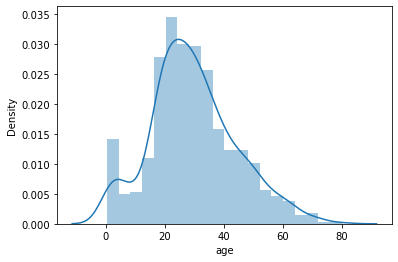

In [6]:
# Distribution of age.
sns.distplot(df['age']);

In [7]:
# Normality test check for imputing strategy
from scipy.stats import normaltest
normaltest(df['age'].dropna())

NormaltestResult(statistic=18.105032952089758, pvalue=0.00011709599657350757)

In [8]:
# Check the median of age.
df['age'].median()

28.0

In [9]:
# Fill the missing values with median value of age.
df['age'] = df['age'].fillna(df['age'].median())

In [10]:
# For embark_town.
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [11]:
# Fill the missing values with the most frequent value of embark_town.
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [12]:
# Recheck missing value.
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
fare           0
embark_town    0
alone          0
dtype: int64

In [13]:
# Number of passengers by gender.
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [14]:
# Survival rate by gender.
pd.crosstab(df['survived'], df['sex'])

sex,female,male
survived,,
0,81,468
1,233,109


In [15]:
# Survival mean rate by gender.
df.groupby('sex').mean()['survived']

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

#### **Create a dummy variable**

In [16]:
df = pd.get_dummies(df, columns=['sex', 'embark_town', 'alone'], drop_first=True)
df

,survived,pclass,age,fare,sex_male,embark_town_Queenstown,embark_town_Southampton,alone_True
0,0,3,22.0,7.2500,1,0,1,0
1,1,1,38.0,71.2833,0,0,0,0
2,1,3,26.0,7.9250,0,0,1,1
3,1,1,35.0,53.1000,0,0,1,0
4,0,3,35.0,8.0500,1,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,1,1
887,1,1,19.0,30.0000,0,0,1,1
888,0,3,28.0,23.4500,0,0,1,0
889,1,1,26.0,30.0000,1,0,0,1


#### **Multicollinearity check**

In [17]:
# Function to calculate VIF.
def calc_vif(X):
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Acceptable'] = np.where(vif['VIF'] < 4, 'Yes', 'No') 
    return (vif) 

In [18]:
calc_vif(df)

,Feature,VIF,Acceptable
0,survived,1.948004,Yes
1,pclass,6.324254,No
2,age,5.072305,No
3,fare,1.673202,Yes
4,sex_male,3.847883,Yes
5,embark_town_Queenstown,1.624991,Yes
6,embark_town_Southampton,4.798438,No
7,alone_True,3.044718,Yes


### **Interpretation**

Some features have a VIF value greater than 4 but less than 10. For now, keep all these features until we have done the modeling.

#### **Define X and y**

In [19]:
# Initial X and y as instructed.
X = df[['pclass', 'sex_male', 'age', 'fare', 'embark_town_Queenstown', 'embark_town_Southampton', 'alone_True']]
y = df['survived']

In [20]:
# Check proportion of label.
y.value_counts()

0    549
1    342
Name: survived, dtype: int64

#### **Logistic regression modelling using statsmodels**

In [21]:
# Build a model.
sm_logit = sm.Logit(y, sm.add_constant(X))
result = sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.448346
         Iterations 6


In [22]:
# Check model summary.
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Wed, 23 Mar 2022   Pseudo R-squ.:                  0.3267
Time:                        17:14:55   Log-Likelihood:                -399.48
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.033e-79
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.0552      0.548      9.218      0.000       3.980       6.130
pclass                     -1.1688      0.140     -8.352      0.000      -1.443      -0.895


**Interpretation**

According to the Wald test result, since embark_town, alone, and fare are considered to have no significant influence on the dependent variable. Thus we may drop these features and rebuild the model.

In [23]:
# Rebuild the model.
X_new = df[['pclass', 'sex_male', 'age']]

sm_logit_new = sm.Logit(y, sm.add_constant(X_new))
result_new = sm_logit_new.fit()

print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.452069
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Wed, 23 Mar 2022   Pseudo R-squ.:                  0.3211
Time:                        17:14:55   Log-Likelihood:                -402.79
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.792e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7247      0.450     10.504      0.000       3.843       5.606
pclass        -1.1717      0.

In [24]:
calc_vif(X_new)

,Feature,VIF,Acceptable
0,pclass,3.669667,Yes
1,sex_male,2.898777,Yes
2,age,3.300372,Yes


**Interpretation**

1. LLR p-value
2. P>|z| (Wald test p-value of each variables)
3. coef (constant value of each betas)

In [25]:
# The intrepretation is only valid for this range of value.
df.describe().loc[['min', 'max']][['pclass', 'age', 'fare']]

,pclass,age,fare
min,1.0,0.42,0.0000
max,3.0,80.00,512.3292


**We modeled the probability of passengers surviving from Titanic collision.**


1. LLR p-value = 2.792e-82 = 0.0000...2792 (Log-Likelihood Ratio test)

   - LLR p-value < 0.05, it means we can reject the null hypothesis (Ho). It can be said that at least one variable has a significant influence on the rate of survival of one person.
<br><br>

2. P>|z| (Wald test)

   - const = 0.000. p-value < 0.05, reject H0. It means the model needs a y-intercept value.
   - pclass = 0.000. p-value < 0.05, reject H0. It means passenger class has a significant influence on the survival rate. The relationship is inverse, which means the higher the class number (class 3 or economy class), the lower the survival rate.
   - age = 0.000. p-value < 0.05, reject H0. It means the age of passengers has a significant influence on the survival rate. The relationship is inverse, which means the older the passenger, the lower the survival rate.
   - sex_male = 0.000. p-value < 0.05, reject H0. It means gender has a significant influence on the survival rate. The relationship is inverse, which means male passengers tend not to survive. Let's assume that adult male passengers think to save women and children first instead of their lives.
<br><br>

3. Coef
   - const = 4.7247
   - pclass = -1.1717
   - age = -0.0345
   - sex_male = -2.6591

***The interpretation of coefs is using Odds-Ratio (OR).***

OR = exp(beta(c-a))

- If OR > 1, c > a: success rate increases if Xi increases.
- If OR < 1, c > a: success rate decreases if Xi increases.

#### **pclass**

In [26]:
# Interpretation of pclass.

c = 3
d = 1 # Choose c and d in the range between 1 and 3, with c > d.
Beta = -1.1717

OR_pclass = np.exp(Beta*(c-d))
print('OR_pclass =', OR_pclass)

OR_pclass_interpretation = 1/OR_pclass
print('OR_pclass_interpretation =', OR_pclass_interpretation)

OR_pclass = 0.09600068040378407
OR_pclass_interpretation = 10.416592838654328


`Interpretation`

- OR_pclass < 1, success rate increases when Xi (pcalss) decreases (3 to 1).
- OR_pclass < 1, first-class passengers are about 10.41 times more likely to survive than third-class passengers.

#### **age**

In [27]:
# Interpretation of age.

c = 50
d = 40 # Choose c and d in the range between 0 to 80, with c > d. 
Beta = -0.0333

OR_age = np.exp(Beta*(c-d))
print('OR_age =', OR_age)

OR_age_interpretation = 1/OR_age
print('OR_age_interpretation =', OR_age_interpretation)

OR_age = 0.716770194155699
OR_age_interpretation = 1.3951472984698035


`Interpretation`

- OR_age < 1, success rate increases when Xi (age) decreases (age of 50 to 40).
- OR_age < 1, passengers aged 40th are about 1.39 times more likely to survive than passengers aged 50th years old.

#### **sex_male**

In [28]:
# Interpretation of sex_male.

c = 1
d = 0
Beta = -2.6123

OR_sex_male = np.exp(Beta*(c-d))
print('OR_sex_male =', OR_sex_male)

OR_sex_male_interpretation = 1/OR_sex_male
print('OR_sex_male_interpretation =', OR_sex_male_interpretation)

OR_sex_male = 0.07336560866224022
OR_sex_male_interpretation = 13.630364665872111


`Interpretation`

- OR_sex_male < 1, success rate increases when Xi (sex) is female.
- OR_sex_male < 1, female passengers are about 13.6 times more likely to survive than male passengers.

#### **Check the accuracy of model using sklearn**

We can compare the accuracy score between models from statsmodels and sklearn.

`Data splitting`

In [29]:
# Splitting data.
X_train, X_test, y_train, y_test= train_test_split(
    X_new,
    y,
    stratify=y, # To keep the classes ratio of the label.
    test_size=0.2, # Size of the set, in this case is 20% of all data.
    random_state=0 # Resulting the same result in every run. 
)

`Model training (sklearn)`

In [30]:
# Train the model.
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### **Validate the model using test set**

`Model by statsmodels`

In [31]:
# Check the model result.
y_predict_proba = result_new.predict(sm.add_constant(X_test))
y_predict_class = np.where(y_predict_proba > .5, 1, 0)

In [32]:
# Check probability of each predictions.
y_predict_proba

153    0.059985
752    0.075721
610    0.477627
200    0.088233
310    0.940114
         ...   
96     0.193981
440    0.707299
75     0.096610
575    0.115515
143    0.115515
Length: 179, dtype: float64

In [33]:
# Check the classification result.
y_predict_class

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0])

### **Evaluation metrics**

`statsmodels`

In [34]:
# The accuracy score of test set.
print('Model accuracy score of the test set:', accuracy_score(y_test, y_predict_class))

Model accuracy score of the test set: 0.776536312849162


`sklearn`

In [35]:
# The accuracy score of test set.
print('Model accuracy score of the test set:', accuracy_score(y_test, model.predict(X_test)))

Model accuracy score of the test set: 0.770949720670391


### **Evaluation metrics interpretation**

As shown above, the accuracy score of the models is pretty similar. To interpret that score, let's say from the total of 100 passengers predicted by the model, about 78 passengers are correctly predicted, regardless of whether they are survived or not (True Positive and True Negative).

<hr>